In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from scipy.integrate import cumtrapz

In [3]:
# csvファイルの読み込み
csv_Accelerometer = "data/Accelerometer3.csv"
csv_Gyroscope = "data/Gyroscope3.csv"
raw_Accelerometer = pd.read_csv(csv_Accelerometer)
raw_Gyroscope = pd.read_csv(csv_Gyroscope)

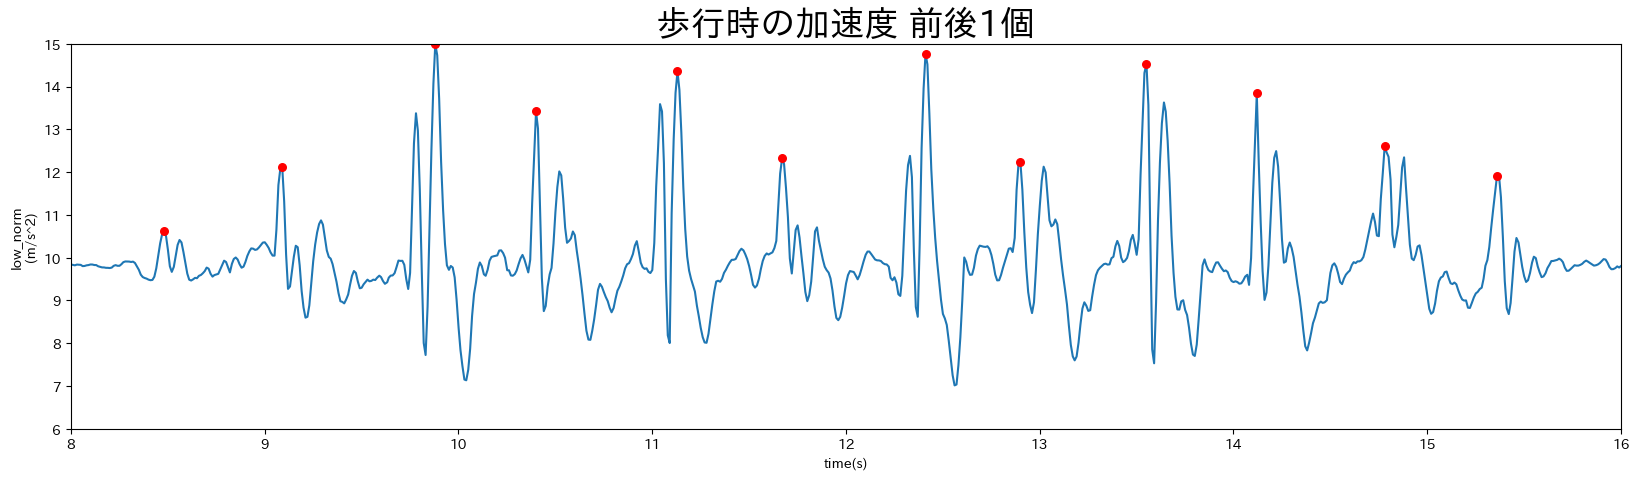

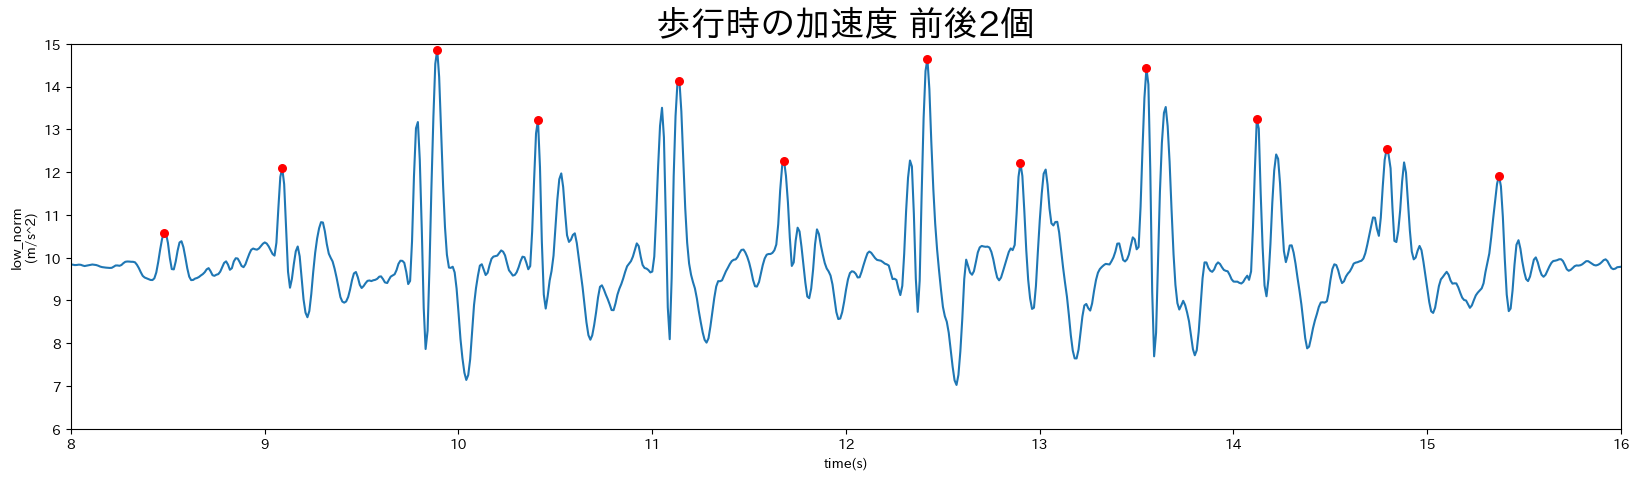

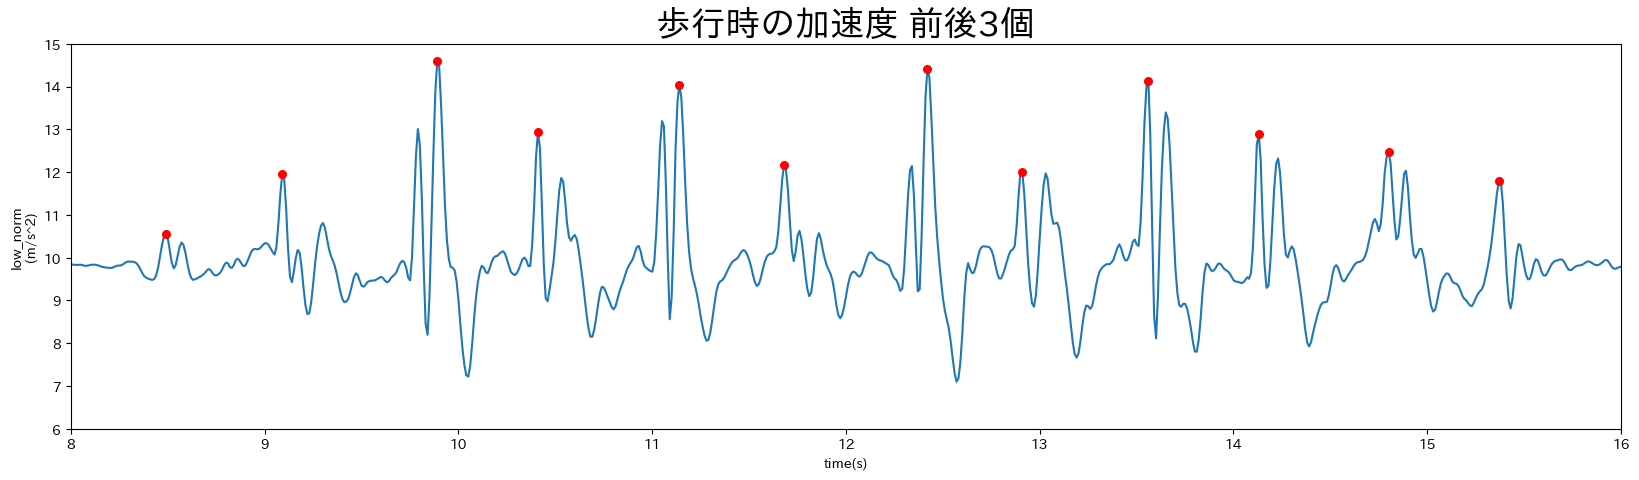

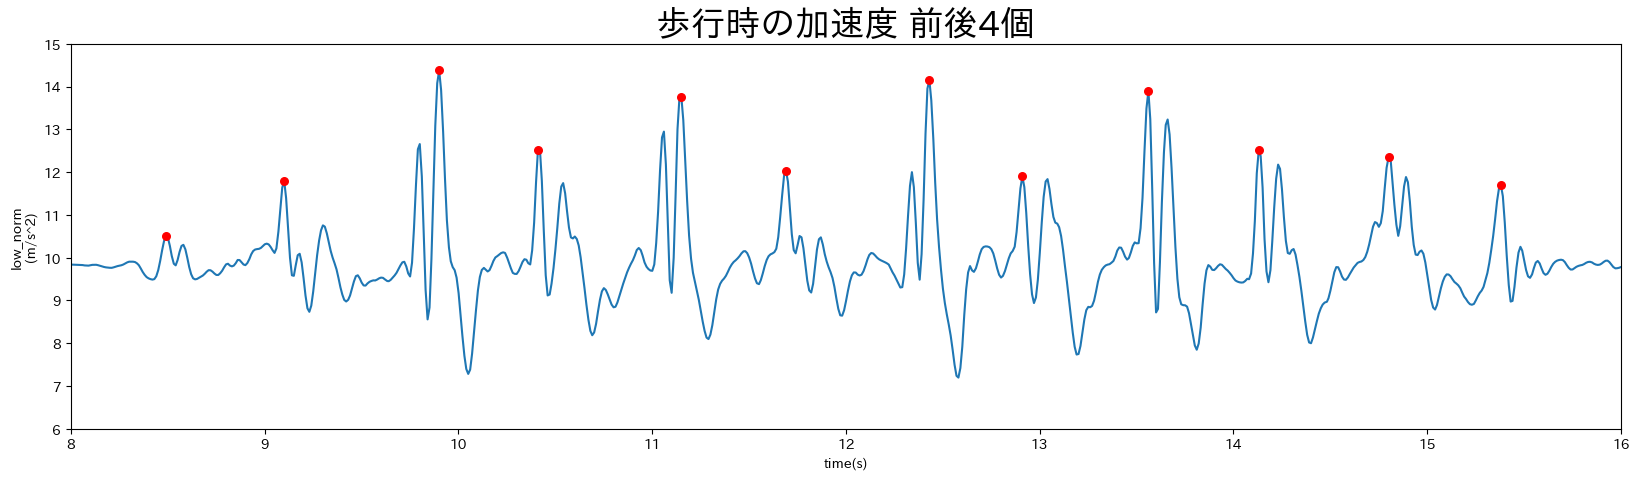

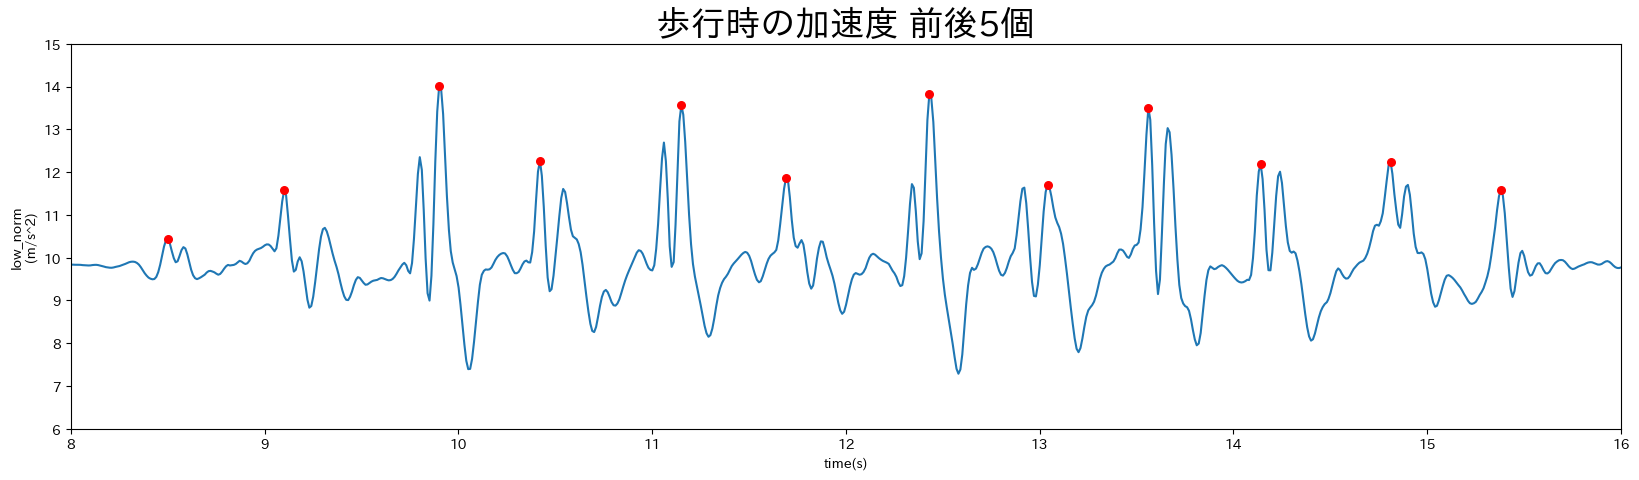

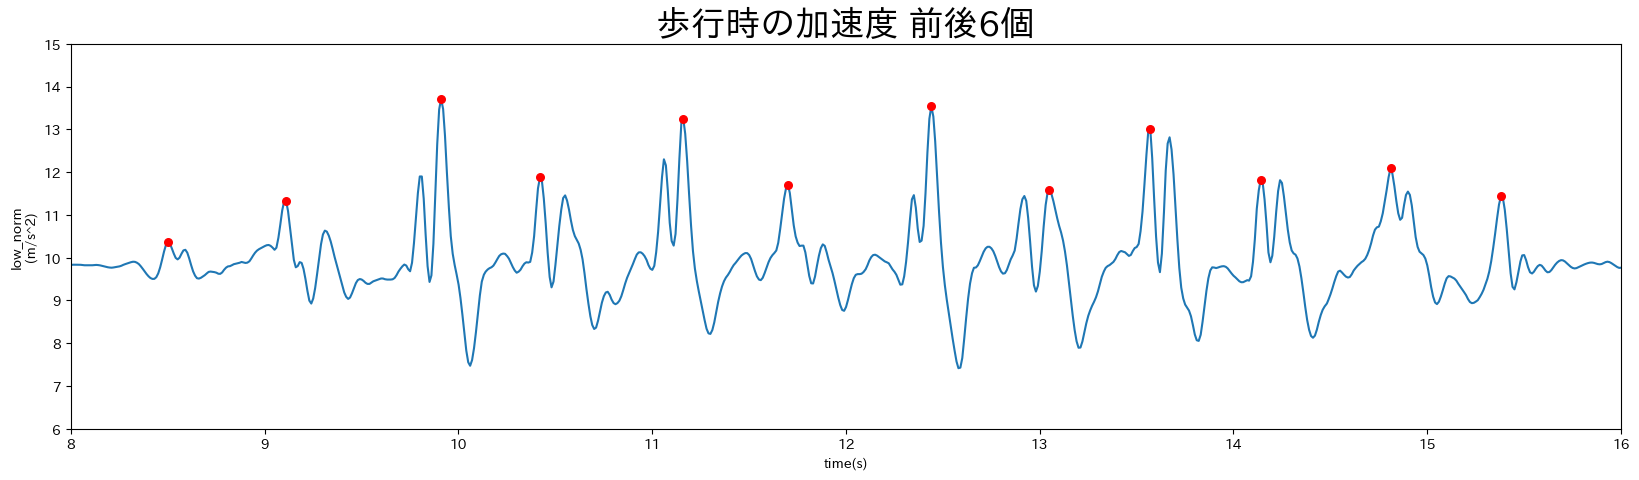

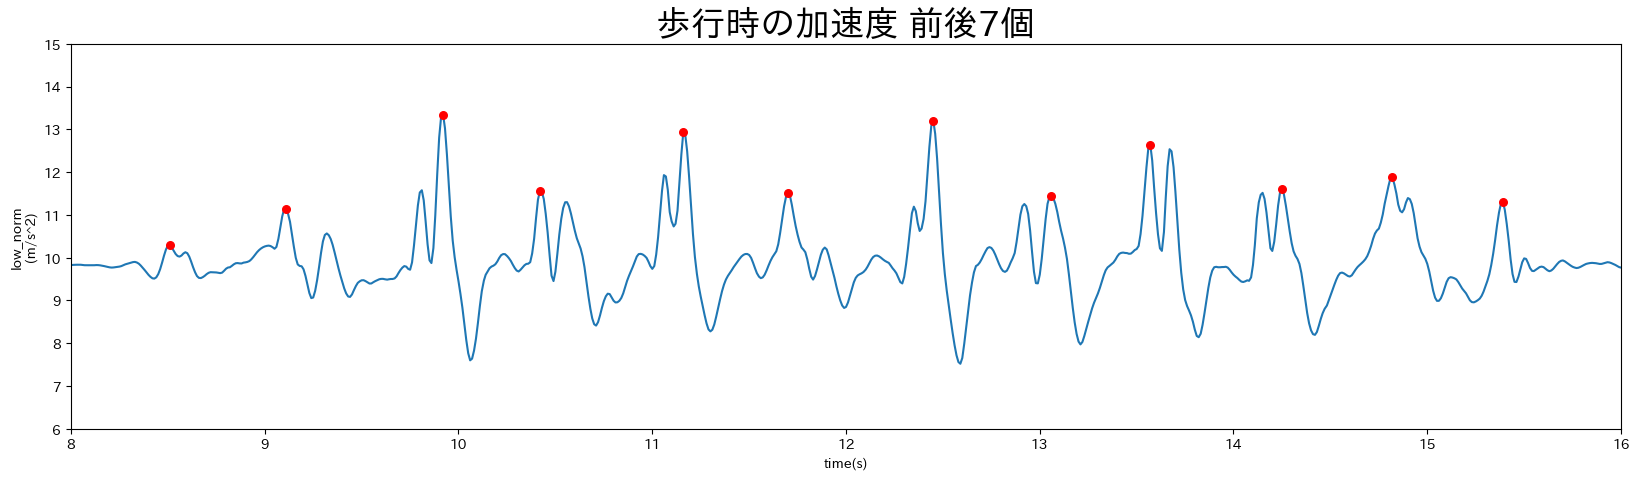

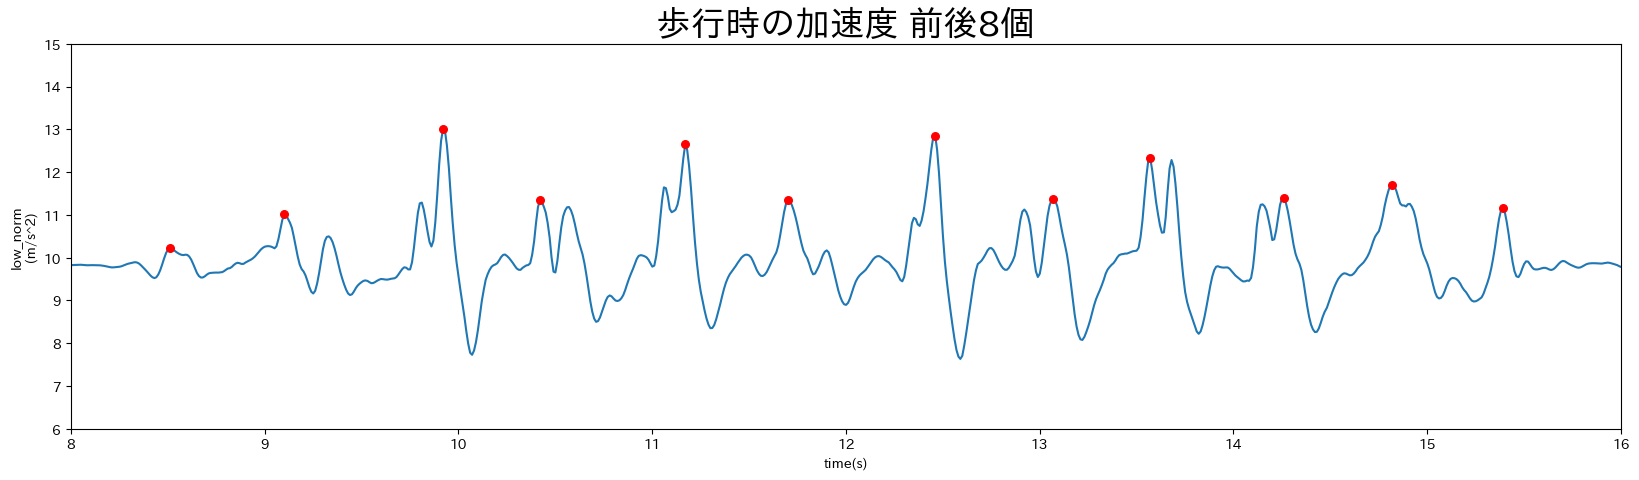

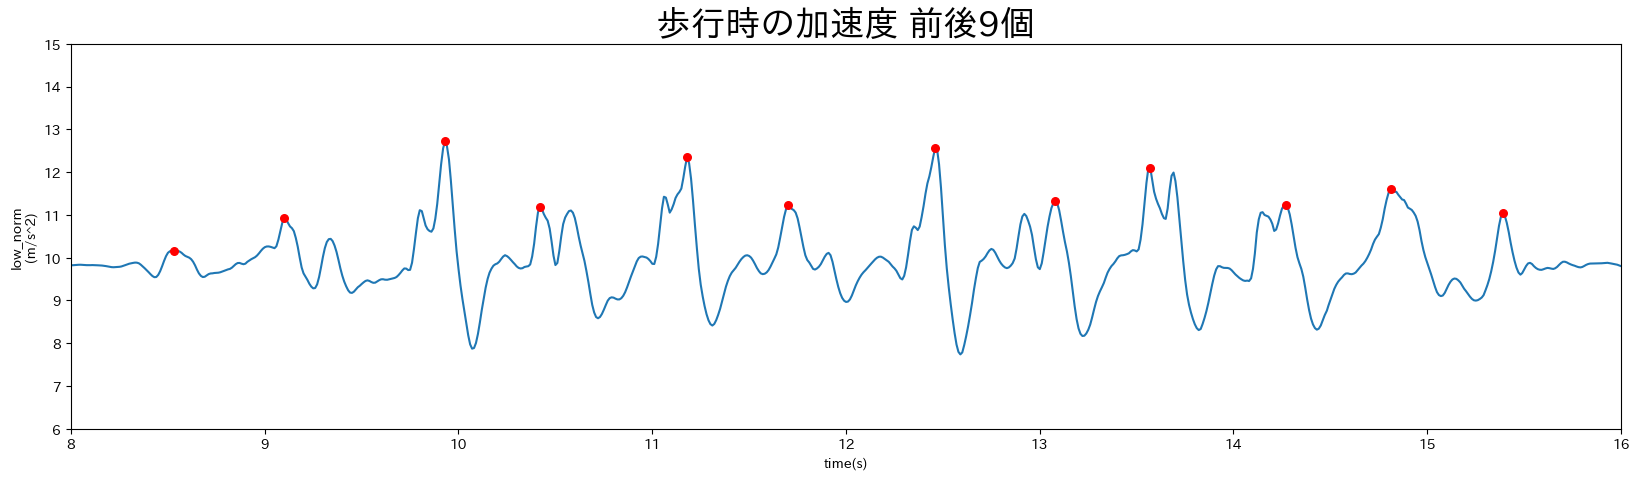

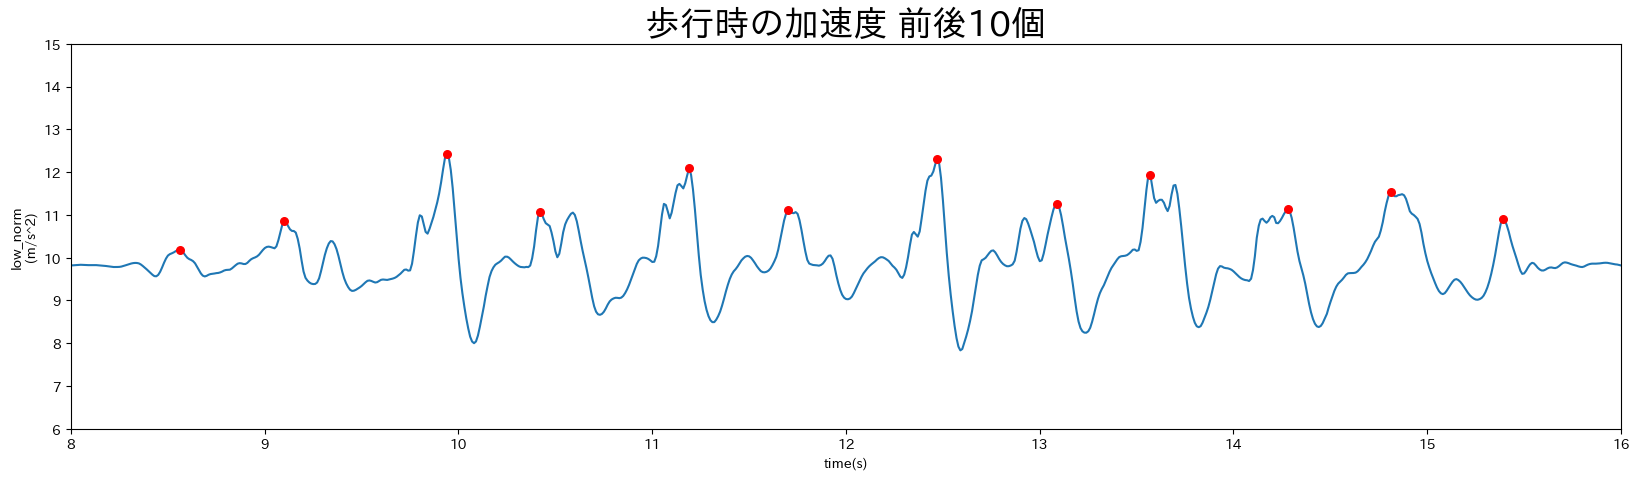

In [23]:
for i in range(10):
    df = pd.read_csv(csv_Accelerometer)
    # normを計算
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    # 移動平均を計算
    df['low_norm'] = df['norm'].rolling(window=i+1).mean()
    # df['low_norm'] = df['low_norm'].rolling(window=10).mean()
    fig = plt.figure(figsize=(20, 5))
    plt.title(f'歩行時の加速度 前後{i+1}個', fontsize=25)
    plt.plot(df['t'], df['low_norm'], zorder=1)
    plt.xlabel('time(s)')
    plt.ylabel('low_norm\n(m/s^2)')
    # 赤点を描画
    peek, _ = signal.find_peaks(df['low_norm'],distance=40, height=10)
    plt.scatter(df['t'][peek], df['low_norm']
                [peek], s=30, color='red', zorder=2)
    plt.ylim(6, 15)
    plt.xlim(8, 16)
    plt.show()    

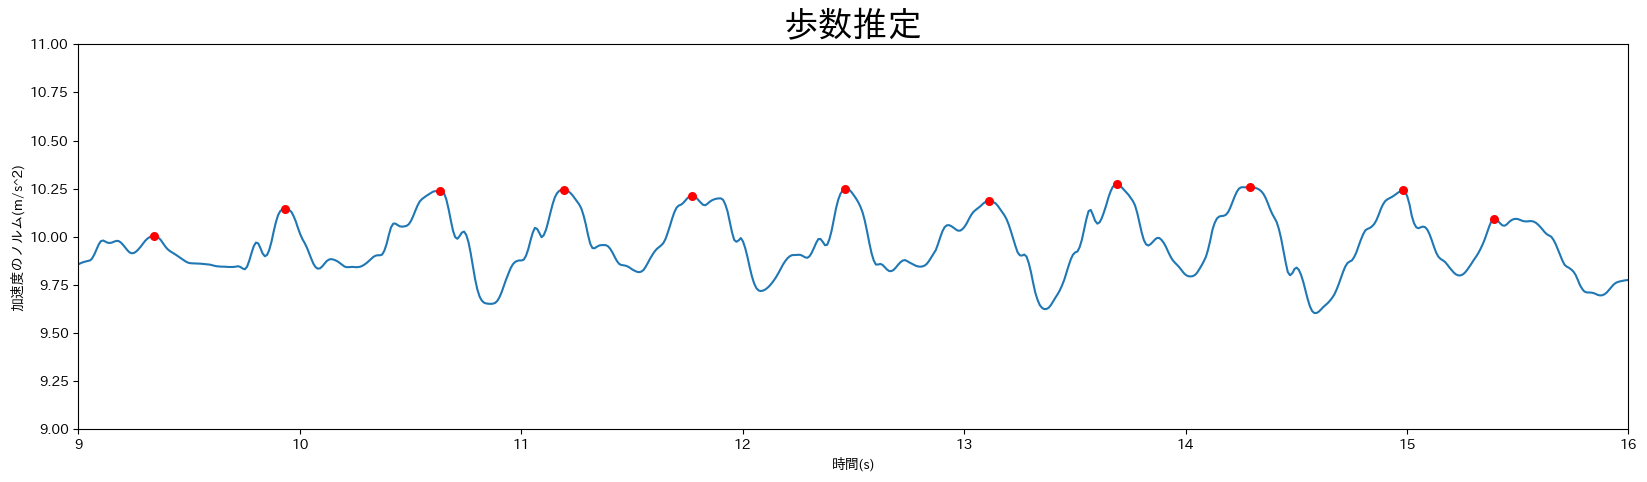

In [191]:
df = pd.read_csv(csv_Accelerometer)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算
df['low_norm'] = df['norm'].rolling(window=90).mean()
# df['low_norm'] = df['low_norm'].rolling(window=10).mean()
fig = plt.figure(figsize=(20, 5))
plt.title(f'歩数推定', fontsize=25)
plt.plot(df['t'], df['low_norm'], zorder=1)
plt.xlabel('時間(s)')
plt.ylabel('加速度のノルム(m/s^2)')
# 赤点を描画
peek, _ = signal.find_peaks(df['low_norm'],distance=40, height=10)
plt.scatter(df['t'][peek], df['low_norm']
            [peek], s=30, color='red', zorder=2)
plt.ylim(9, 11)
plt.xlim(9, 16)
plt.show()    

In [75]:
# csvファイルの読み込み
csv_Accelerometer = "data/Accelerometer3_filter.csv"
csv_Gyroscope = "data/Gyroscope3_filter.csv"
raw_Accelerometer = pd.read_csv(csv_Accelerometer)
raw_Gyroscope = pd.read_csv(csv_Gyroscope)

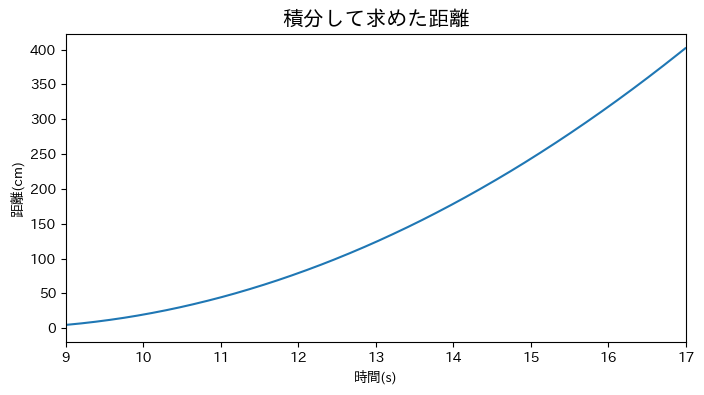

In [173]:
df = pd.read_csv(csv_Accelerometer)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# normを2回積分
df['norm_cum'] = cumtrapz(df['norm'], df['t'], initial=0)
df['norm_cum_cum'] = cumtrapz(df['norm_cum'], df['t'], initial=0)

fig = plt.figure(figsize=(8, 4))
plt.title(f'積分して求めた距離', fontsize=15)
plt.plot(df['t'], df['norm_cum_cum'], zorder=1)
plt.xlabel('時間(s)')
plt.ylabel('距離(cm)')
plt.xlim(9,17)
plt.show()

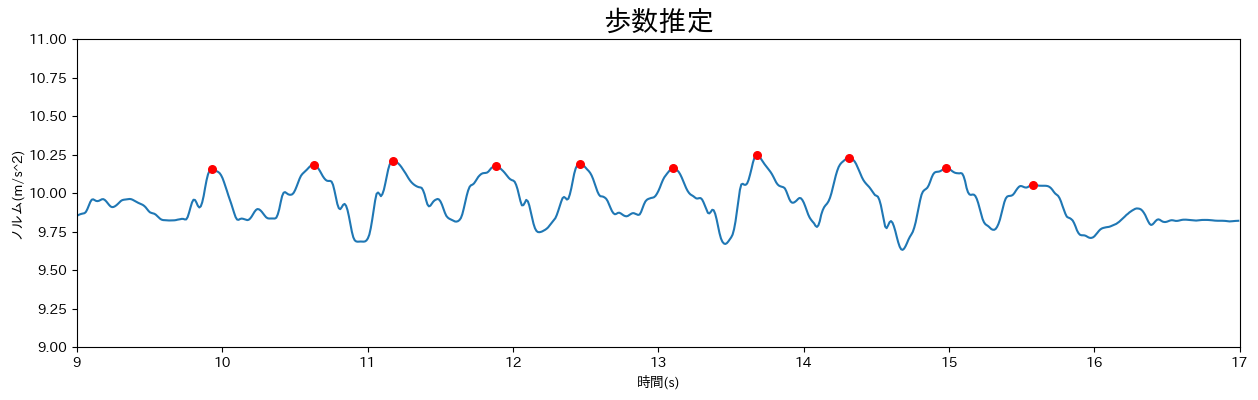

In [137]:
df = pd.read_csv(csv_Accelerometer)
# normを計算
df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
# 移動平均を計算
df['low_norm'] = df['norm'].rolling(window=100).mean()
# df['low_norm'] = df['low_norm'].rolling(window=10).mean()
fig = plt.figure(figsize=(15, 4))
plt.title(f'歩数推定', fontsize=20)
plt.plot(df['t'], df['low_norm'], zorder=1)
plt.xlabel('時間(s)')
plt.ylabel('ノルム(m/s^2)')
# 赤点を描画
peek, _ = signal.find_peaks(df['low_norm'],distance=40, height=10)
plt.scatter(df['t'][peek], df['low_norm']
            [peek], s=30, color='red', zorder=2)
plt.ylim(9, 11)
plt.xlim(9, 17)
plt.show()    

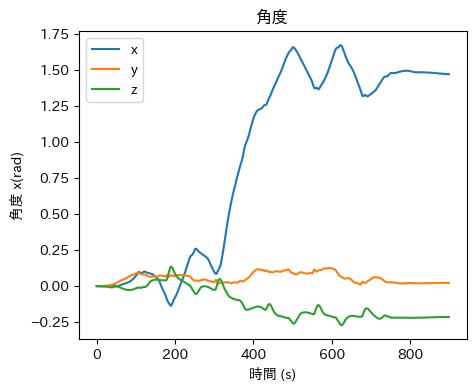

In [4]:
# Constants
SAMPLING_FREQ = 100  # Hz
DT = 1 / SAMPLING_FREQ

gyro_data = pd.read_csv('./data/Gyroscope3_filter.csv')
angle_data = np.cumsum(gyro_data * DT) *-1

# Plot angle data
fig = plt.figure(figsize=(5, 4))
plt.title('角度')
plt.xlabel('時間 (s)')
plt.ylabel('角度 x(rad)')
plt.plot(angle_data['x'],label='x')
plt.plot(angle_data['y'],label='y')
plt.plot(angle_data['z'],label='z')
plt.legend()
plt.show()


# gyro_norm = (gyro_data['x']**2)*0.5
# gyro_norm = np.cumsum(gyro_norm * DT)

# # Plot angle data
# plt.xlabel('時間 (s)')
# plt.ylabel('角度 x(rad)')
# plt.plot(gyro_norm)
# plt.show()

In [1]:
# Constants
ACC_FILE_PATH = './data/Accelerometer_filter.csv'
GYRO_FILE_PATH = './data/Gyroscope_filter.csv'
SAMPLING_FREQ = 100  # Hz
DT = 1 / SAMPLING_FREQ 


def search_peek_time(file_path):
    df = pd.read_csv(file_path)
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    df['low_norm'] = df['norm'].rolling(window=10).mean()
    # ピークを検出
    peek, _ = signal.find_peaks(df['low_norm'], height=12)
    ## peekのtを取得
    peek_t = df['t'][peek]

    return np.round(peek_t,2)

gyro_data = pd.read_csv(GYRO_FILE_PATH)
# 't'列を除外したデータを取得
gyro_data_no_t = gyro_data.drop(columns=['t'])
# 'x', 'y', 'z'列のみを積分
angle_data_no_t = np.cumsum(gyro_data_no_t) * DT
# 積分したデータに't'列を結合
angle_data = pd.concat([gyro_data['t'], angle_data_no_t], axis=1)
angle_data['rounded_t'] = np.round(angle_data['t'], 2)
# search_peek_time()のkeysを取得
peek_t_values = search_peek_time(ACC_FILE_PATH).values
angle_data_peek = angle_data[angle_data['rounded_t'].isin(peek_t_values)]
angle_data_peek_x = angle_data_peek['x']
print(angle_data_peek)

print(angle_data_peek_x)

plt.title('角度 x')
plt.xlabel('時間 (s)')
plt.ylabel('角度 x(rad)')
plt.plot(angle_data['t'], angle_data['x'])
plt.show()

NameError: name 'pd' is not defined

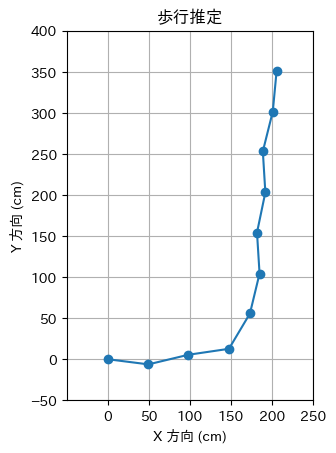

In [187]:
# Constants
ACC_FILE_PATH = './data/Accelerometer3_filter.csv'
GYRO_FILE_PATH = './data/Gyroscope3_filter.csv'
SAMPLING_FREQ = 100  # Hz
DT = 1 / SAMPLING_FREQ 
STEP_LENGTH = 50  # cm


def search_peek_time(file_path):
    df = pd.read_csv(file_path)
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    df['low_norm'] = df['norm'].rolling(window=100).mean()
    # ピークを検出
    peek, _ = signal.find_peaks(df['low_norm'],distance=40, height=10)
    ## peekのtを取得
    peek_t = df['t'][peek]

    return np.round(peek_t,2)

gyro_data = pd.read_csv(GYRO_FILE_PATH)
# 't'列を除外したデータを取得
gyro_data_no_t = gyro_data.drop(columns=['t'])
# 'x', 'y', 'z'列のみを積分
angle_data_no_t = np.cumsum(gyro_data_no_t )* DT
# 積分したデータに't'列を結合
angle_data = pd.concat([gyro_data['t'], angle_data_no_t], axis=1)
angle_data['rounded_t'] = np.round(angle_data['t'], 2)
# search_peek_time()のkeysを取得
peek_t_values = search_peek_time(ACC_FILE_PATH).values
angle_data_peek = angle_data[angle_data['rounded_t'].isin(peek_t_values)]
angle_data_peek_x = angle_data_peek['x']

x_displacement = STEP_LENGTH * np.cos(angle_data_peek_x)
y_displacement = STEP_LENGTH * np.sin(angle_data_peek_x)
x_cumulative = np.cumsum(x_displacement)
y_cumulative = np.cumsum(y_displacement)*-1
# 初期座標(0,0)が描画されるように挿入
x_cumulative = np.insert(x_cumulative, 0, 0)
y_cumulative = np.insert(y_cumulative, 0, 0)

plt.figure()
plt.plot(x_cumulative, y_cumulative, marker='o')

# X軸とY軸の範囲を揃える
plt.xlim(-50, 250)
plt.ylim(-50, 400)

# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')
#軸を揃える
plt.xlabel('X 方向 (cm)')
plt.ylabel('Y 方向 (cm)')
plt.title('歩行推定')
plt.xticks([  0,  50, 100, 150, 200, 250])
plt.grid()
plt.show()

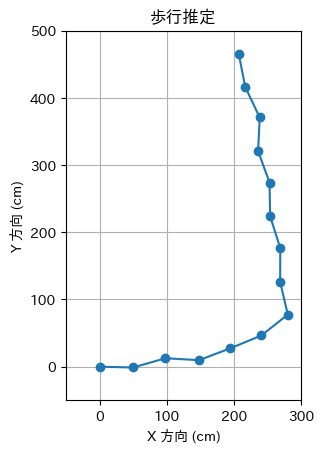

In [190]:
# Constants
ACC_FILE_PATH = './data/Accelerometer_filter.csv'
GYRO_FILE_PATH = './data/Gyroscope_filter.csv'
SAMPLING_FREQ = 100  # Hz
DT = 1 / SAMPLING_FREQ 
STEP_LENGTH = 50  # cm


def search_peek_time(file_path):
    df = pd.read_csv(file_path)
    df['norm'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    df['low_norm'] = df['norm'].rolling(window=100).mean()
    # ピークを検出
    peek, _ = signal.find_peaks(df['low_norm'],distance=40, height=10)
    ## peekのtを取得
    peek_t = df['t'][peek]

    return np.round(peek_t,2)

gyro_data = pd.read_csv(GYRO_FILE_PATH)
# 't'列を除外したデータを取得
gyro_data_no_t = gyro_data.drop(columns=['t'])
# 'x', 'y', 'z'列のみを積分
angle_data_no_t = np.cumsum(gyro_data_no_t )* DT
# 積分したデータに't'列を結合
angle_data = pd.concat([gyro_data['t'], angle_data_no_t], axis=1)
angle_data['rounded_t'] = np.round(angle_data['t'], 2)
# search_peek_time()のkeysを取得
peek_t_values = search_peek_time(ACC_FILE_PATH).values
angle_data_peek = angle_data[angle_data['rounded_t'].isin(peek_t_values)]
angle_data_peek_x = angle_data_peek['x']

x_displacement = STEP_LENGTH * np.cos(angle_data_peek_x)
y_displacement = STEP_LENGTH * np.sin(angle_data_peek_x)
x_cumulative = np.cumsum(x_displacement)
y_cumulative = np.cumsum(y_displacement)
# 初期座標(0,0)が描画されるように挿入
x_cumulative = np.insert(x_cumulative, 0, 0)
y_cumulative = np.insert(y_cumulative, 0, 0)

plt.figure()
plt.plot(x_cumulative, y_cumulative, marker='o')

# X軸とY軸の範囲を揃える
plt.xlim(-50, 300)
plt.ylim(-50, 500)

# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')
#軸を揃える
plt.xlabel('X 方向 (cm)')
plt.ylabel('Y 方向 (cm)')
plt.title('歩行推定')
# plt.xticks([  0,  50, 100, 150, 200, 250])
plt.grid()
plt.show()

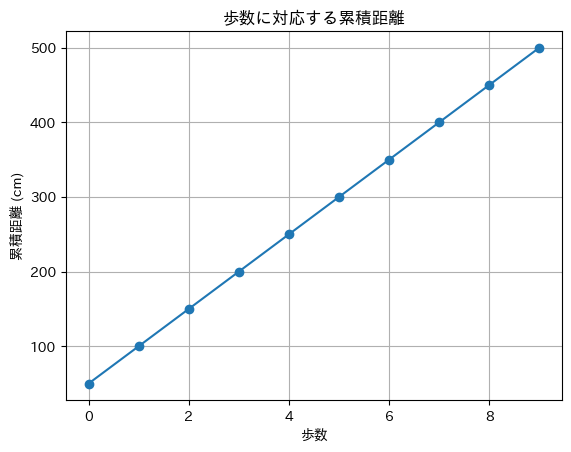

In [169]:
# Constants
ACC_FILE_PATH = './data/Accelerometer3_filter.csv'
GYRO_FILE_PATH = './data/Gyroscope3_filter.csv'
SAMPLING_FREQ = 100  # Hz
DT = 1 / SAMPLING_FREQ
STEP_LENGTH = 50  # cm


def search_peek_time(file_path):
    df = pd.read_csv(file_path)
    df['norm'] = (df['x'] ** 2 + df['y'] ** 2 + df['z'] ** 2) ** 0.5
    df['low_norm'] = df['norm'].rolling(window=100).mean()
    # ピークを検出
    peek, _ = signal.find_peaks(df['low_norm'], distance=40, height=10)
    ## peekのtを取得
    peek_t = df['t'][peek]

    return np.round(peek_t, 2)


gyro_data = pd.read_csv(GYRO_FILE_PATH)
# 't'列を除外したデータを取得
gyro_data_no_t = gyro_data.drop(columns=['t'])
# 'x', 'y', 'z'列のみを積分
angle_data_no_t = np.cumsum(gyro_data_no_t) * DT
# 積分したデータに't'列を結合
angle_data = pd.concat([gyro_data['t'], angle_data_no_t], axis=1)
angle_data['rounded_t'] = np.round(angle_data['t'], 2)
# search_peek_time()のkeysを取得
peek_t_values = search_peek_time(ACC_FILE_PATH).values
angle_data_peek = angle_data[angle_data['rounded_t'].isin(peek_t_values)]
angle_data_peek_x = angle_data_peek['x']

# 歩数に対応する距離を計算
displacement = np.cumsum(np.full(len(peek_t_values), STEP_LENGTH))

plt.figure()
plt.plot(displacement, marker='o')
plt.xlabel('歩数')
plt.ylabel('累積距離 (cm)')
plt.title('歩数に対応する累積距離')
plt.grid()
plt.show()
